### Read in Dataset

In [1]:
#Libraries
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
corpus = pd.read_csv('Spotify_reviews.csv')

In [3]:
# Preview
corpus.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


## Tagging Reviews
Creating a fucntion to tag the reivew as "Positive", "Negative", or "Neutral"

I will assume a positive reviewer has also left an app rating that is postive. The critia is as follows:


Positive = rating: 4-5

Neutral = rating: 3

Negative = rating: 1-2

### Creating a function to make a new column (Sentiment) to catagorize the reviews

In [4]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(Rating):
    if Rating<3:
        return 'negative'
    elif Rating==3:
        return 'neutral'
    else:
        return 'positive'
    
corpus['Sentiment']=corpus['Rating'].apply(getAnalysis)

#show preview
corpus.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Sentiment
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,positive
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,positive
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,positive
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,negative
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,negative


## Pulling Key Findings From Results

Using NLP, we will determine frequently occuring words and phrases for negative reviews. Bi-grams (2 words) will be used.

### Dispalying the Data

In [5]:
#using the same function as above to tag the dataset with sentiment tags
def getAnalysis(Rating):
    if Rating<3:
        return 'negative'
    elif Rating==3:
        return 'neutral'
    else:
        return 'positive'
    
corpus['Sentiment']=corpus['Rating'].apply(getAnalysis)

#show preview
corpus.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Sentiment
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,positive
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,positive
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,positive
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,negative
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,negative


### Postive Reviews

Pulling out only the negatively tagged sentiment reviews

In [6]:
#extracting rows where the setiment is "negative"
negative_sentiment = corpus.loc[corpus['Sentiment'] == "negative"]
negative_sentiment.head()   

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Sentiment
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,negative
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,negative
9,2022-07-09 13:11:32,"I'm deleting this app, for the following reaso...",1,318,NaN,negative
10,2022-07-09 13:11:17,"Love Spotify, and usually this app is the best...",2,1,NaN,negative
11,2022-07-09 13:10:50,Can't play Spotify when on WiFi,1,1,NaN,negative


In [7]:
#stop words
sw = stopwords.words('english')

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

### Cleaning the data

In [8]:
#removing stop words, punctuation, and capitalization
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    # print(doc)
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

token_docs = [doc_preparer(doc, sw) for doc in negative_sentiment["Review"]]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hopmiller\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
# renaming the cleaned data
clean_neg_sent= token_docs

### Top 50 most frequently occuring paired words (bi-gram- 2 words)

                Bi-gram  Frequency
0             play song       2045
1            please fix       1213
2             song play       1192
3             song want       1127
4         song playlist       1005
5            play music        983
6          listen music        886
7           listen song        839
8           want listen        751
9           pay premium        746
10           new update        741
11            stop play        660
12              use app        637
13          random song        622
14          last update        562
15           every time        551
16          use spotify        548
17           every song        542
18            skip song        540
19            music app        521
20             add song        500
21            like song        498
22              many ad        484
23  internet connection        470
24              go back        458
25             play bar        456
26          late update        456
27            close 

[Text(0, 0, 'play song'),
 Text(1, 0, 'please fix'),
 Text(2, 0, 'song play'),
 Text(3, 0, 'song want'),
 Text(4, 0, 'song playlist'),
 Text(5, 0, 'play music'),
 Text(6, 0, 'listen music'),
 Text(7, 0, 'listen song'),
 Text(8, 0, 'want listen'),
 Text(9, 0, 'pay premium'),
 Text(10, 0, 'new update'),
 Text(11, 0, 'stop play'),
 Text(12, 0, 'use app'),
 Text(13, 0, 'random song'),
 Text(14, 0, 'last update'),
 Text(15, 0, 'every time'),
 Text(16, 0, 'use spotify'),
 Text(17, 0, 'every song'),
 Text(18, 0, 'skip song'),
 Text(19, 0, 'music app'),
 Text(20, 0, 'add song'),
 Text(21, 0, 'like song'),
 Text(22, 0, 'many ad'),
 Text(23, 0, 'internet connection'),
 Text(24, 0, 'go back'),
 Text(25, 0, 'play bar'),
 Text(26, 0, 'late update'),
 Text(27, 0, 'close app'),
 Text(28, 0, 'app work'),
 Text(29, 0, 'song like'),
 Text(30, 0, 'open app'),
 Text(31, 0, 'start play'),
 Text(32, 0, 'want play'),
 Text(33, 0, 'even though'),
 Text(34, 0, 'recent update'),
 Text(35, 0, 'one song'),
 Text(

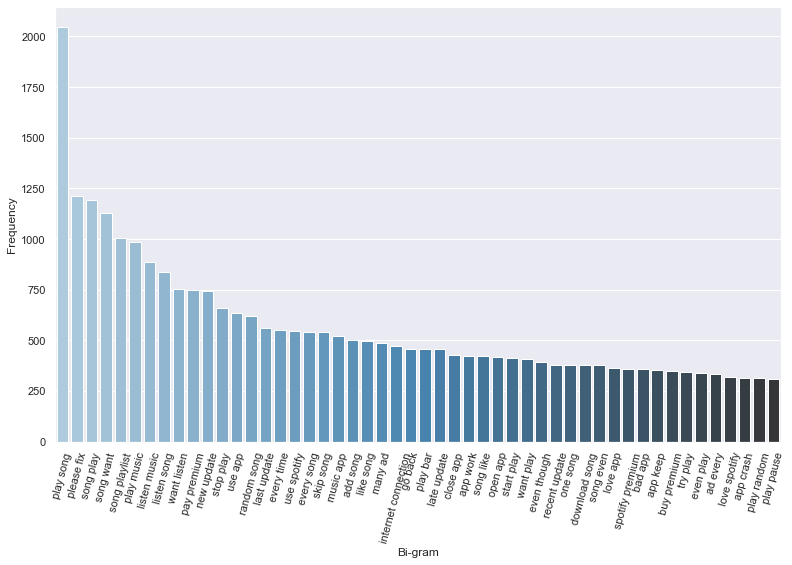

In [12]:
# Most frequently occuring bigrams
def get_top_n2_words(clean_neg_sent, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(clean_neg_sent)
    bag_of_words = vec1.transform(clean_neg_sent)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(clean_neg_sent, n=50)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)


# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)


## Results
The frequently occurring phrases in these reviews pertained to Spotify Premium and paying for. In relation to this was the ads and skipping songs. Many other users also referenced the new updates. Playing random songs were also heavily referenced, the company might want to look into their algorithm suggest new songs for users.  
